In [1]:
fig_dir = "../../figures/"
fig_ext = "pdf"

In [2]:
# Gravitational wave spectrum diagram
import matplotlib.pyplot as plt
#plt.style.use("../thesis-style.mpl")

import astropy.units as u
import numpy as np

import thesis

import grasshopper.interferometers as ifo
import grasshopper.timingarray as arrays

In [18]:
parameters = {
    "acoustic": {
        "color": "red",
        "range": [1e1, 1e4]
    },
    "space": {
        "color":"blue",
        "range": [1e-5, 1e1]
    },
    "cosmological": {
        "color":"green",
        "range": [1e-5, 1e-12]
    }
}

In [50]:
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e-12, 1e4])

aligo = ifo.AdvancedLIGO()
#ax.text(280, 6e-23, r"\textsf{aLIGO}", rotation=60, rotation_mode='anchor', fontsize=6)
geo = ifo.GEO(frequencies=np.logspace(1,3.4,1000)*u.hertz)
#ax.text(280, 1.5e-21, r"\textsf{GEO}", rotation=60, rotation_mode='anchor', fontsize=6)
elisa = ifo.EvolvedLISA()
#bdecigo = ifo.BDecigo()
decigo = ifo.Decigo()
#bbo = ifo.BigBangObservatory()
#print(decigo.noise_amplitude(decigo.frequencies))
lisa = ifo.LISA()

In [5]:
ipta = arrays.IPTA()

In [26]:
import matplotlib

In [27]:
matplotlib.rcParams['font.sans-serif'] = ['Source Code Pro', 'sans-serif']

In [42]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Lato'], 'monospace':['Source Code Pro']})
rc('text', usetex=False)


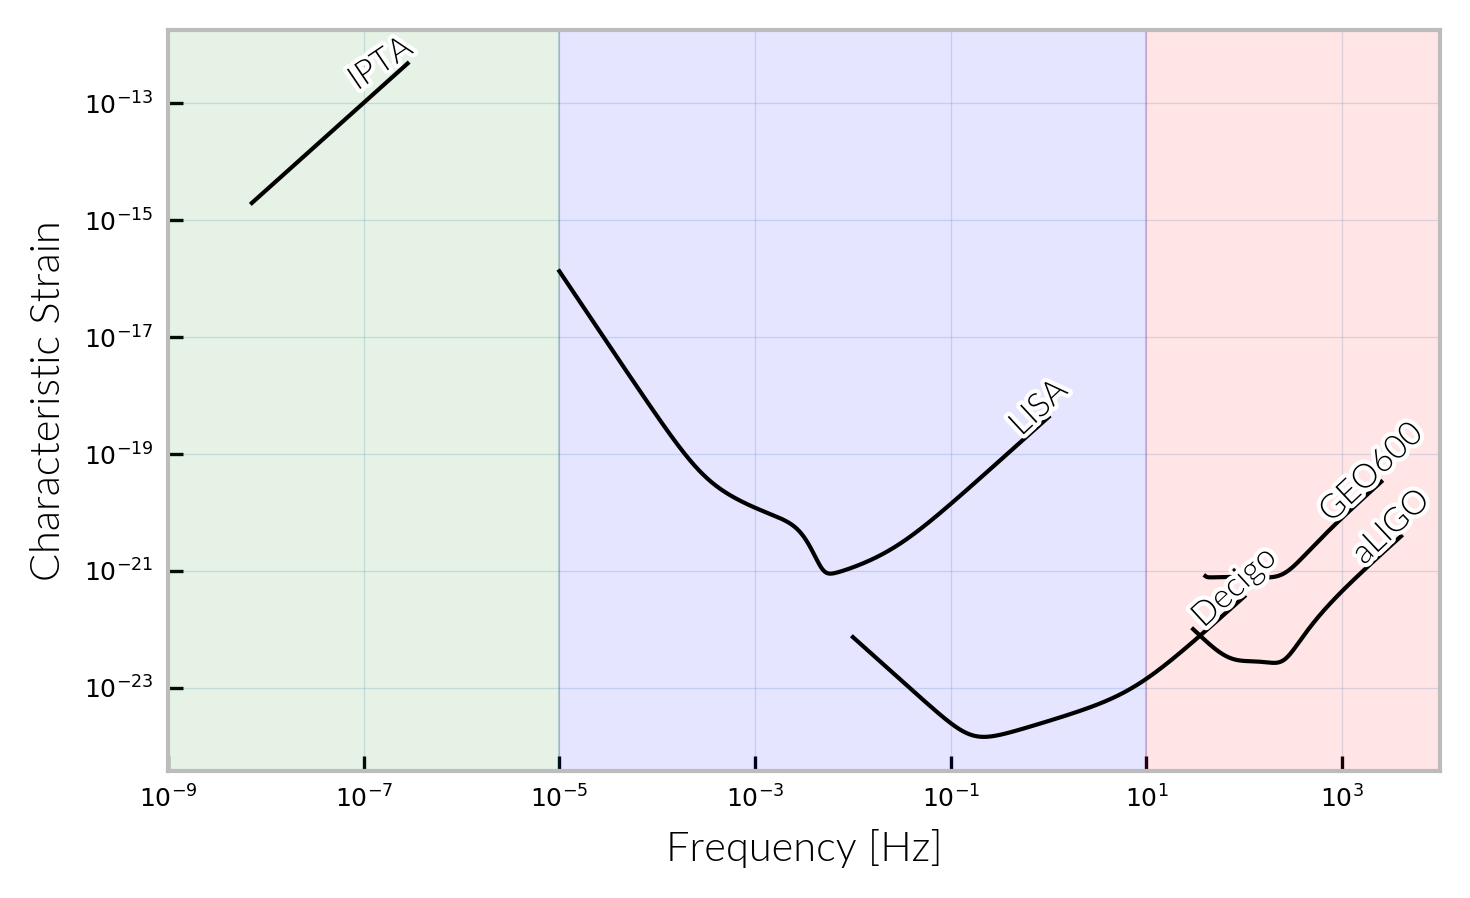

In [51]:
figsize = (6.0, 6.0/1.618) 
f, ax = plt.subplots(1,1, figsize=figsize, dpi=300)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1e-9, 1e4])

#ax.text(0.07, 3e-20, r"\textsf{eLISA}", rotation=60, rotation_mode='anchor', fontsize=6)
aligo.plot(ax, color="k", lw=1)
lisa.plot(ax, color="k", lw=1)
#bdecigo.plot(ax, color="k", lw=1)
#bbo.plot(ax)
decigo.plot(ax, color="k", lw=1)
#elisa.plot(ax, color="k", lw=1)
geo.plot(ax, color="k", lw=1)

ipta_line = ipta.plot(ax, color="k", lw=1)
ipta_line[0].set_xdata(ipta_line[0].get_xdata()*u.hertz)

for band in parameters.items():
    ymax = ax.get_ylim()[1]
    #ax.text((band[1]["range"][1] - band[1]["range"][0])/2, ymax-100, r"{}".format(band[0]))
    ax.axvspan(band[1]["range"][0], band[1]["range"][1], alpha=0.1, color=band[1]["color"])
#ax.grid(which="minor", lw=0.5, linestyle="..", zorder=100)

import grasshopper.sources as sources
# sources
#cbc = sources.IMR(m1=30*u.solMass, m2=32*u.solMass, r=900*1e6*u.parsec)
#cbc.plot(ax)

thesis.labelLines(f.gca().get_lines()[:-1], fontsize=8)
thesis.labelLine(ipta_line[0], label="IPTA", x=1.5e-7, yshift=2.5,  fontsize=8)

#f.tight_layout()

#for label in ax.get_yticklabels():
##    label.set_usetex(True)
#   label.set_fontproperties(thesis.ticks_font)
ax.ticklabel_format(useMathText=False)
f = thesis.thesisify(f) #thesis.set_fonts(f)

f.savefig("{}/intro/gw-spectrum.{}".format(fig_dir, fig_ext), dpi=300)